# LOGISTIC REGRESSION

# Problem Statement
An education company, X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. When these people browse the courses and fill up a form providing their email address or phone number, they are classified to be a lead.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. 

X Education needs us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

## Reading and Understanding Data

In [636]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [637]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [638]:
# Importing the dataset
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspect Data

In [639]:
leads.shape

(9240, 37)

In [640]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

In [641]:
# Looking at all the columns and rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [642]:
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


### Handling the Categorical Variables having 'Select' values.

After looking at the data, we have found that a few columns have the value **'Select'** which means that the customer has not selected any option in those columns. Let us look at those columns and replace the 'Select' values with proper data.

**The columns having 'Select' values are:**
1. City
2. Specialization
3. How did you hear about X Education
4. Lead Profile

In [643]:
# Checking the count of unique values in the 'City' column
leads.City.value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

> We can see that 28% of the values in the City column have value as 'Select', let us replace these values with **'Other Cities'**

In [644]:
# Replacing the 'Select' value in City with NaN
leads.loc[leads.City == 'Select', 'City'] = 'Other Cities'

In [645]:
leads.City.value_counts(normalize=True)

Mumbai                         0.412020
Other Cities                   0.375320
Thane & Outskirts              0.096164
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

In [646]:
# Checking the count of unique values in the 'Specialization' column
leads.Specialization.value_counts(normalize = True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Media and Advertising                0.026019
Travel and Tourism                   0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

We can see that 24% of the data in the column 'Specialization' has the value 'Select'. This column tells us about the industry domain in which the customer worked before. So we can replace the 'Select' values to **NaN**.

In [647]:
leads.loc[leads.Specialization == 'Select', 'Specialization'] = 'Not Specified'

In [648]:
leads.Specialization.value_counts(normalize = True)

Not Specified                        0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Media and Advertising                0.026019
Travel and Tourism                   0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [649]:
# Checking the count of unique values in the 'How did you hear about X Education' column
leads['How did you hear about X Education'].value_counts(normalize = True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

> We can see that 71% of the data in the column 'How did you hear about X Education' has the value 'Select'. Let's replace the 'Select' values to **NaN**.

In [650]:
leads.loc[leads['How did you hear about X Education'] == 'Select', 'How did you hear about X Education'] = np.nan

In [651]:
leads['How did you hear about X Education'].value_counts(normalize = True)

Online Search            0.406030
Word Of Mouth            0.174874
Student of SomeSchool    0.155779
Other                    0.093467
Multiple Sources         0.076382
Advertisements           0.035176
Social Media             0.033668
Email                    0.013065
SMS                      0.011558
Name: How did you hear about X Education, dtype: float64

In [652]:
# Checking the count of unique values in the 'Lead Profile' column
leads['Lead Profile'].value_counts(normalize = True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

> We can see that 63% of the data in the column 'Lead Profile' has the value 'Select'. Let's replace the 'Select' values to **Potential Lead**, as most of the rows with these values have the corresponding occupation as **'Unemployed' or 'Student'** and these are the kind of people who are mostly looking for a career kick start and joining a course would really be a good option.

In [653]:
leads.loc[leads['Lead Profile'] == 'Select', 'Lead Profile'] = 'Potential Lead'

In [654]:
leads['Lead Profile'].value_counts(normalize = True)

Potential Lead                 0.881795
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

### Null Values

In [655]:
# Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We can see that, the columns **How did you hear about X Education, Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score** have more than 40% of null values, so let's drop these columns. 

In [656]:
leads = leads.drop(['How did you hear about X Education','Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                    'Asymmetrique Activity Score', 'Asymmetrique Profile Score' ],axis = 1)

In [657]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [658]:
# Re-checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

We can see that the columns **'Lead Source', 'TotalVisits', 'Country', 'Specialization', 'Page Views Per Visit', 'Last Activity, 'Lead Profile', 'City', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City'** still have null values.

Before we handle these null values let's check for skewness in the categorical variables. 

### Skewness of Categories in Categorical Variables

In [659]:
# Identifying the Categorical Variables
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [660]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [661]:
# Checking for skewed data in 'Lead Origin'
leads['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [662]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

We can see here that the categories here are highly skewed, i.e., there is a huge difference between the categories 'Landing Page Submission', 'API', 'Lead Add Form' and 'Lead Import', 'Quick Add Form'. So let's remove the categories 'Lead Import' and 'Quick Add Form'

In [663]:
# Removing skewed categories in Lead Origin
leads = leads.drop(leads[leads['Lead Origin'] == 'Lead Import'].index)

In [664]:
leads = leads.drop(leads[leads['Lead Origin'] == 'Quick Add Form'].index)

In [665]:
leads['Lead Origin'].value_counts(normalize = True)

Landing Page Submission    0.532012
API                        0.389808
Lead Add Form              0.078179
Name: Lead Origin, dtype: float64

In [666]:
# Checking for skewed data in 'Lead Origin'
leads['Lead Source'].value_counts(normalize = True)

Google               0.313443
Direct Traffic       0.277923
Olark Chat           0.191803
Organic Search       0.126120
Reference            0.058361
Welingak Website     0.015519
Referral Sites       0.013661
bing                 0.000656
google               0.000546
Click2call           0.000437
Live Chat            0.000219
Press_Release        0.000219
Social Media         0.000219
testone              0.000109
youtubechannel       0.000109
WeLearn              0.000109
blog                 0.000109
welearnblog_Home     0.000109
NC_EDM               0.000109
Facebook             0.000109
Pay per Click Ads    0.000109
Name: Lead Source, dtype: float64

In [667]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
youtubechannel          1
WeLearn                 1
blog                    1
welearnblog_Home        1
NC_EDM                  1
Facebook                1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

We can see that the data is high skewed as there is a lot of difference between 'Google','Direct Traffic','Olark Chat','Organic Search','Reference','Welingak Website','Referral Sites' and the rest of the categories.

In [668]:
#Removing skewed values from LEAD SOURCE column
leads = leads[leads['Lead Source'].isin(['Google','Direct Traffic','Olark Chat','Organic Search','Reference','Welingak Website','Referral Sites'])]

In [669]:
leads['Lead Source'].value_counts(normalize=True)

Google              0.314439
Direct Traffic      0.278807
Olark Chat          0.192413
Organic Search      0.126521
Reference           0.058546
Welingak Website    0.015568
Referral Sites      0.013705
Name: Lead Source, dtype: float64

In [670]:
leads.nunique()

Prospect ID                                      9121
Lead Number                                      9121
Lead Origin                                         3
Lead Source                                         7
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1726
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [671]:
# Checking for skewness in the COUNTRY column
leads['Country'].value_counts(normalize=True)

India                   0.957803
United States           0.010216
United Arab Emirates    0.007847
Singapore               0.003553
Saudi Arabia            0.002961
United Kingdom          0.002221
Australia               0.001925
Qatar                   0.001481
Bahrain                 0.001036
Hong Kong               0.001036
France                  0.000888
Oman                    0.000888
unknown                 0.000740
Kuwait                  0.000592
Germany                 0.000592
Nigeria                 0.000592
South Africa            0.000592
Sweden                  0.000444
Canada                  0.000444
Italy                   0.000296
China                   0.000296
Asia/Pacific Region     0.000296
Netherlands             0.000296
Bangladesh              0.000296
Ghana                   0.000296
Belgium                 0.000296
Uganda                  0.000296
Philippines             0.000296
Indonesia               0.000148
Russia                  0.000148
Denmark   

We can see that the data is highly skewed in the Country column as 95% of the values belong to 'India', let us drop this column as using this column to build the model would wrongly influence results. 

In [672]:
leads = leads.drop(['Country'], axis = 1)

In [673]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9121 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9121 non-null   object 
 1   Lead Number                                    9121 non-null   int64  
 2   Lead Origin                                    9121 non-null   object 
 3   Lead Source                                    9121 non-null   object 
 4   Do Not Email                                   9121 non-null   object 
 5   Do Not Call                                    9121 non-null   object 
 6   Converted                                      9121 non-null   int64  
 7   TotalVisits                                    9015 non-null   float64
 8   Total Time Spent on Website                    9121 non-null   int64  
 9   Page Views Per Visit                           9015 

In [674]:
# Checking for categorical variables
leads.nunique()

Prospect ID                                      9121
Lead Number                                      9121
Lead Origin                                         3
Lead Source                                         7
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1726
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [675]:
# Checking for skewness in the 'Last Activity' column
leads['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376051
SMS Sent                        0.299469
Olark Chat Conversation         0.107570
Page Visited on Website         0.069832
Converted to Lead               0.047145
Email Bounced                   0.035303
Email Link Clicked              0.029548
Form Submitted on Website       0.012838
Unreachable                     0.010181
Unsubscribed                    0.006419
Had a Phone Conversation        0.003320
Approached upfront              0.000996
View in browser link Clicked    0.000664
Email Received                  0.000221
Email Marked Spam               0.000221
Visited Booth in Tradeshow      0.000111
Resubscribed to emails          0.000111
Name: Last Activity, dtype: float64

In [676]:
# Removing the column due to data imbalance.
leads = leads.drop(['Last Activity'], axis = 1)

In [677]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9121 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9121 non-null   object 
 1   Lead Number                                    9121 non-null   int64  
 2   Lead Origin                                    9121 non-null   object 
 3   Lead Source                                    9121 non-null   object 
 4   Do Not Email                                   9121 non-null   object 
 5   Do Not Call                                    9121 non-null   object 
 6   Converted                                      9121 non-null   int64  
 7   TotalVisits                                    9015 non-null   float64
 8   Total Time Spent on Website                    9121 non-null   int64  
 9   Page Views Per Visit                           9015 

In [678]:
# Checking for skewness in the 'Specialization' column
leads['Specialization'].value_counts(normalize = True)

Not Specified                        0.243795
Finance Management                   0.125796
Human Resource Management            0.109032
Marketing Management                 0.108512
Operations Management                0.064847
Business Administration              0.051982
IT Projects Management               0.047563
Supply Chain Management              0.044964
Banking, Investment And Insurance    0.043925
Media and Advertising                0.026121
Travel and Tourism                   0.026121
International Business               0.023002
Healthcare Management                0.020403
Hospitality Management               0.014685
E-COMMERCE                           0.014165
Retail Management                    0.012995
Rural and Agribusiness               0.009487
E-Business                           0.007407
Services Excellence                  0.005198
Name: Specialization, dtype: float64

>No significant skewness found.

In [679]:
# Checking for skewness in the 'What is your current occupation' column
leads['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.853711
Working Professional    0.108787
Student                 0.032233
Other                   0.002479
Housewife               0.001550
Businessman             0.001240
Name: What is your current occupation, dtype: float64

1. We can see that the data is highly skewed.
2. We can replace the values with 'Housewife' to 'Unemployed' and remove the categories, 'Other' and 'Businessman' as they have very less data.

In [680]:
# Dropping the categories
leads = leads.drop(leads[leads['What is your current occupation'] == 'Other'].index)
leads = leads.drop(leads[leads['What is your current occupation'] == 'Businessman'].index)

In [681]:
# Replacing the value 'Housewife' to 'Unemployed'
leads.loc[leads['What is your current occupation'] == 'Housewife', 'What is your current occupation'] = 'Unemployed'

In [682]:
leads['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.858454
Working Professional    0.109193
Student                 0.032353
Name: What is your current occupation, dtype: float64

In [683]:
# Checking for skewness in the 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6408
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

> **We can see that the data here is highly skewed. We can drop this column.**

In [684]:
leads = leads.drop(['What matters most to you in choosing a course'], axis = 1)

In [685]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9097 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9097 non-null   object 
 1   Lead Number                               9097 non-null   int64  
 2   Lead Origin                               9097 non-null   object 
 3   Lead Source                               9097 non-null   object 
 4   Do Not Email                              9097 non-null   object 
 5   Do Not Call                               9097 non-null   object 
 6   Converted                                 9097 non-null   int64  
 7   TotalVisits                               8992 non-null   float64
 8   Total Time Spent on Website               9097 non-null   int64  
 9   Page Views Per Visit                      8992 non-null   float64
 10  Specialization                      

In [686]:
# Checking for skewness in the 'Tags' column
leads.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.349404
Ringing                                              0.203733
Interested in other courses                          0.087610
Already a student                                    0.079661
Closed by Horizzon                                   0.061517
switched off                                         0.041299
Busy                                                 0.031968
Lost to EINS                                         0.030067
Not doing further education                          0.024538
Interested  in full time MBA                         0.020045
Graduation in progress                               0.018663
invalid number                                       0.014342
Diploma holder (Not Eligible)                        0.010886
wrong number given                                   0.007949
opp hangup                                           0.005702
number not provided                                  0.004320
in touch

In [687]:
leads.Tags.value_counts()

Will revert after reading the email                  2022
Ringing                                              1179
Interested in other courses                           507
Already a student                                     461
Closed by Horizzon                                    356
switched off                                          239
Busy                                                  185
Lost to EINS                                          174
Not doing further education                           142
Interested  in full time MBA                          116
Graduation in progress                                108
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

> The data here is highly imbalanced and looking the dataset, it also has around 36% of null values, so lets drop this column as keeping this column would majorly influence the regression model.

In [688]:
leads = leads.drop(['Tags'], axis = 1)

In [689]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9097 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9097 non-null   object 
 1   Lead Number                               9097 non-null   int64  
 2   Lead Origin                               9097 non-null   object 
 3   Lead Source                               9097 non-null   object 
 4   Do Not Email                              9097 non-null   object 
 5   Do Not Call                               9097 non-null   object 
 6   Converted                                 9097 non-null   int64  
 7   TotalVisits                               8992 non-null   float64
 8   Total Time Spent on Website               9097 non-null   int64  
 9   Page Views Per Visit                      8992 non-null   float64
 10  Specialization                      

In [690]:
leads.nunique()

Prospect ID                                 9097
Lead Number                                 9097
Lead Origin                                    3
Lead Source                                    7
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1724
Page Views Per Visit                         114
Specialization                                19
What is your current occupation                3
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply 

In [691]:
# Checking skewness for 'Lead Profile'
leads['Lead Profile'].value_counts(normalize=True)

Potential Lead                 0.881922
Other Leads                    0.073935
Student of SomeSchool          0.037280
Lateral Student                0.003744
Dual Specialization Student    0.003120
Name: Lead Profile, dtype: float64

> We can drop the categories 'Lateral Student' and 'Dual Specialization Student'.

In [692]:
# Replacing the values
leads = leads.drop(leads[(leads['Lead Profile'] == 'Lateral Student') | 
                         (leads['Lead Profile'] == 'Dual Specialization Student')].index)

In [693]:
leads['Lead Profile'].value_counts(normalize=True)

Potential Lead           0.888016
Other Leads              0.074446
Student of SomeSchool    0.037537
Name: Lead Profile, dtype: float64

In [694]:
# Checking skewness in City column
leads['City'].value_counts(normalize = True)

Mumbai                         0.414059
Other Cities                   0.375442
Thane & Outskirts              0.095693
Other Cities of Maharashtra    0.056421
Other Metro Cities             0.048828
Tier II Cities                 0.009556
Name: City, dtype: float64

In [695]:
# Dropping the rows having 'Teir II Cities' as it has very less data.
leads = leads.drop(leads[leads['City'] == 'Tier II Cities'].index)

In [696]:
leads['City'].value_counts()

Mumbai                         3163
Other Cities                   2868
Thane & Outskirts               731
Other Cities of Maharashtra     431
Other Metro Cities              373
Name: City, dtype: int64

In [697]:
# Checking skewness in City column
leads['Last Notable Activity'].value_counts(normalize = True)

Modified                        0.366927
Email Opened                    0.305679
SMS Sent                        0.235969
Page Visited on Website         0.034521
Olark Chat Conversation         0.020379
Email Link Clicked              0.019154
Email Bounced                   0.006682
Unsubscribed                    0.004900
Unreachable                     0.003452
Had a Phone Conversation        0.001559
Email Marked Spam               0.000223
View in browser link Clicked    0.000111
Resubscribed to emails          0.000111
Email Received                  0.000111
Approached upfront              0.000111
Form Submitted on Website       0.000111
Name: Last Notable Activity, dtype: float64

In [698]:
# Dropping the category rows with less percentage of data.Dual Specialization Student
leads = leads.drop(leads[(leads['Last Notable Activity'] == 'Page Visited on Website') | 
                         (leads['Last Notable Activity'] == 'Olark Chat Conversation') |
                         (leads['Last Notable Activity'] == 'Email Link Clicked') | 
                         (leads['Last Notable Activity'] == 'Email Bounced') |
                         (leads['Last Notable Activity'] == 'Unsubscribed') | 
                         (leads['Last Notable Activity'] == 'Unreachable') |
                         (leads['Last Notable Activity'] == 'Had a Phone Conversation') | 
                         (leads['Last Notable Activity'] == 'Email Marked Spam') |
                         (leads['Last Notable Activity'] == 'Page Visited on Website') | 
                         (leads['Last Notable Activity'] == 'Olark Chat Conversation') |
                         (leads['Last Notable Activity'] == 'Email Link Clicked') | 
                         (leads['Last Notable Activity'] == 'Email Received') |
                         (leads['Last Notable Activity'] == 'Form Submitted on Website') | 
                         (leads['Last Notable Activity'] == 'View in browser link Clicked') |
                         (leads['Last Notable Activity'] == 'Approached upfront') | 
                         (leads['Last Notable Activity'] == 'Resubscribed to emails')].index)

In [699]:
leads['Last Notable Activity'].value_counts()

Modified        3295
Email Opened    2745
SMS Sent        2119
Name: Last Notable Activity, dtype: int64

In [700]:
leads.nunique()

Prospect ID                                 8159
Lead Number                                 8159
Lead Origin                                    3
Lead Source                                    7
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   35
Total Time Spent on Website                 1684
Page Views Per Visit                          88
Specialization                                19
What is your current occupation                3
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply 

### Checking for skewness in binary variables

In [701]:
leads['Do Not Email'].value_counts(normalize=True)

No     0.934796
Yes    0.065204
Name: Do Not Email, dtype: float64

In [702]:
leads = leads.drop(['Do Not Email'], axis = 1)

In [703]:
leads['Do Not Call'].value_counts(normalize=True)

No     0.999755
Yes    0.000245
Name: Do Not Call, dtype: float64

In [704]:
leads = leads.drop(['Do Not Call'], axis = 1)

In [705]:
leads['Search'].value_counts(normalize=True)

No     0.998407
Yes    0.001593
Name: Search, dtype: float64

In [706]:
leads = leads.drop(['Search'], axis = 1)

In [707]:
leads['Magazine'].value_counts()

No    8159
Name: Magazine, dtype: int64

In [708]:
leads = leads.drop(['Magazine'], axis = 1)

In [709]:
leads['Newspaper Article'].value_counts(normalize=True)

No     0.999755
Yes    0.000245
Name: Newspaper Article, dtype: float64

In [710]:
leads = leads.drop(['Newspaper Article'], axis = 1)

In [711]:
leads['X Education Forums'].value_counts()

No     8158
Yes       1
Name: X Education Forums, dtype: int64

In [712]:
leads = leads.drop(['X Education Forums'], axis = 1)

In [713]:
leads['Digital Advertisement'].value_counts(normalize = True)

No     0.99951
Yes    0.00049
Name: Digital Advertisement, dtype: float64

In [714]:
leads = leads.drop(['Digital Advertisement'], axis = 1)

In [715]:
leads['Newspaper'].value_counts(normalize=True)

No     0.999877
Yes    0.000123
Name: Newspaper, dtype: float64

In [716]:
leads = leads.drop(['Newspaper'], axis =1)

In [717]:
leads['Through Recommendations'].value_counts(normalize=True)

No     0.999387
Yes    0.000613
Name: Through Recommendations, dtype: float64

In [718]:
leads = leads.drop(['Through Recommendations'], axis = 1)

In [719]:
leads['Receive More Updates About Our Courses'].value_counts()

No    8159
Name: Receive More Updates About Our Courses, dtype: int64

In [720]:
leads = leads.drop(['Receive More Updates About Our Courses'], axis = 1)

> As we can see the binary variables **Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital, Advertisement, Through Recommendations, Receive More Updates About Our Courses** have been dropped as these variables were highly skewed.

In [721]:
# Dropping variables with just one category as it would influence the data.
leads = leads.drop(['Update me on Supply Chain Content','Get updates on DM Content',
                    'I agree to pay the amount through cheque'], axis = 1)

In [722]:
# Checking for skewness in 'A free copy of Mastering The Interview'
leads['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.686971
Yes    0.313029
Name: A free copy of Mastering The Interview, dtype: float64

> No skewed data.

### Re-checking the Null Values

In [723]:
# Re-Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.25
Total Time Spent on Website                0.00
Page Views Per Visit                       1.25
Specialization                            15.01
What is your current occupation           28.66
Lead Profile                              28.84
City                                      14.90
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

We can see that the columns **What is your current occupation & Lead Profile** have 28% of null values.

In [724]:
# Checking the data of column - What is your current occupation, to impute appropriate null values.
leads['What is your current occupation'].describe()

count           5821
unique             3
top       Unemployed
freq            4997
Name: What is your current occupation, dtype: object

We can clearly see that most of the values in this column are 'Unemployed', hence we can impute null values in this data to 'Unemployed' based on Mode Imputation.

In [725]:
# Imputing the null values
leads['What is your current occupation'] = leads['What is your current occupation'].replace(to_replace = np.nan, value = 'Unemployed')

In [726]:
# Re-Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.25
Total Time Spent on Website                0.00
Page Views Per Visit                       1.25
Specialization                            15.01
What is your current occupation            0.00
Lead Profile                              28.84
City                                      14.90
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [727]:
# Checking the data of column - 'Lead Profile', to impute appropriate null values.
leads['Lead Profile'].describe()

count               5806
unique                 3
top       Potential Lead
freq                5184
Name: Lead Profile, dtype: object

In [728]:
leads['Lead Profile'].value_counts(normalize = True)

Potential Lead           0.892869
Other Leads              0.073200
Student of SomeSchool    0.033930
Name: Lead Profile, dtype: float64

We can clearly see that most of the values in this column are 'Potential Lead', hence we can impute null values in this data to 'Potential Lead' based on Mode Imputation.

In [729]:
# Imputing the null values
leads['Lead Profile'] = leads['Lead Profile'].replace(to_replace = np.nan, value = 'Potential Lead')

In [730]:
# Re-Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.25
Total Time Spent on Website                0.00
Page Views Per Visit                       1.25
Specialization                            15.01
What is your current occupation            0.00
Lead Profile                               0.00
City                                      14.90
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [731]:
# Dropping the null values from the columns having less than 15% of null values.
leads = leads.dropna(subset = ['TotalVisits','Page Views Per Visit','Specialization','City'])
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Not Specified,Unemployed,Potential Lead,Other Cities,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Not Specified,Unemployed,Potential Lead,Other Cities,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Potential Lead,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Not Specified,Unemployed,Potential Lead,Mumbai,No,Modified


In [732]:
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
Lead Profile                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Dropping unneccessary columns

In [733]:
leads['Lead Number'].value_counts()

585722    1
607626    1
617871    1
597393    1
634263    1
         ..
588546    1
652035    1
580405    1
606981    1
641025    1
Name: Lead Number, Length: 6823, dtype: int64

In [734]:
#Dropping the column 'Prospect ID' as it has no readable values.
leads = leads.drop(['Prospect ID'], axis = 1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6823 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             6823 non-null   int64  
 1   Lead Origin                             6823 non-null   object 
 2   Lead Source                             6823 non-null   object 
 3   Converted                               6823 non-null   int64  
 4   TotalVisits                             6823 non-null   float64
 5   Total Time Spent on Website             6823 non-null   int64  
 6   Page Views Per Visit                    6823 non-null   float64
 7   Specialization                          6823 non-null   object 
 8   What is your current occupation         6823 non-null   object 
 9   Lead Profile                            6823 non-null   object 
 10  City                                    6823 non-null   obje

In [735]:
#Dropping the column 'Total Time Spent on Website' as we cannot peform Logistic Regression on Time Series Data.
leads = leads.drop(['Total Time Spent on Website'], axis = 1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6823 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             6823 non-null   int64  
 1   Lead Origin                             6823 non-null   object 
 2   Lead Source                             6823 non-null   object 
 3   Converted                               6823 non-null   int64  
 4   TotalVisits                             6823 non-null   float64
 5   Page Views Per Visit                    6823 non-null   float64
 6   Specialization                          6823 non-null   object 
 7   What is your current occupation         6823 non-null   object 
 8   Lead Profile                            6823 non-null   object 
 9   City                                    6823 non-null   object 
 10  A free copy of Mastering The Interview  6823 non-null   obje

In [736]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Potential Lead,Other Cities,No,Modified
1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Potential Lead,Other Cities,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Potential Lead,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Potential Lead,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Potential Lead,Mumbai,No,Modified


### Checking the number of retained rows, after DATA CLEANING

In [737]:
retained = len(leads.index)
print(retained)

6823


In [738]:
retainedp = round(100*(retained/9240),2)
print(retainedp)

73.84


In [739]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6823 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             6823 non-null   int64  
 1   Lead Origin                             6823 non-null   object 
 2   Lead Source                             6823 non-null   object 
 3   Converted                               6823 non-null   int64  
 4   TotalVisits                             6823 non-null   float64
 5   Page Views Per Visit                    6823 non-null   float64
 6   Specialization                          6823 non-null   object 
 7   What is your current occupation         6823 non-null   object 
 8   Lead Profile                            6823 non-null   object 
 9   City                                    6823 non-null   object 
 10  A free copy of Mastering The Interview  6823 non-null   obje

## EDA

### Outlier Analysis

In [740]:
# Checking for continuous variables in the data
leads.nunique()

Lead Number                               6823
Lead Origin                                  3
Lead Source                                  7
Converted                                    2
TotalVisits                                 35
Page Views Per Visit                        86
Specialization                              19
What is your current occupation              3
Lead Profile                                 3
City                                         5
A free copy of Mastering The Interview       2
Last Notable Activity                        3
dtype: int64

**The continuous variables are:**
1. TotalVisits
2. Page Views Per Visit                          

In [741]:
# Checking for outliers
num_leads = leads[['TotalVisits','Page Views Per Visit']]
num_leads.head()

,TotalVisits,Page Views Per Visit
0,0.0,0.0
1,5.0,2.5
2,2.0,2.0
3,1.0,1.0
4,2.0,1.0


In [742]:
num_leads.describe()

,TotalVisits,Page Views Per Visit
count,6823.000000,6823.000000
mean,3.574088,2.628275
std,3.390631,2.163180
min,0.000000,0.000000
25%,2.000000,1.330000
50%,3.000000,2.000000
75%,5.000000,4.000000
max,55.000000,55.000000


We can see from the statistical table that there are outliers in the data.

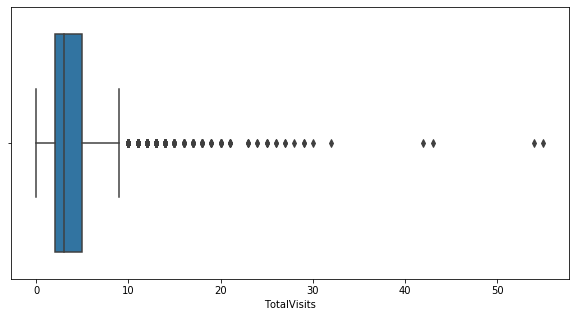

In [743]:
# Visualizing Outliers for 'TotalVisits'
plt.figure(figsize = (10, 5))
sns.boxplot(leads['TotalVisits'])
plt.show()

In [744]:
# Checking the outliers at quantile level.
print(leads['TotalVisits'].quantile([.90,.95,.96,.97,.98,.99,1]))

0.90     7.0
0.95     9.0
0.96    10.0
0.97    11.0
0.98    13.0
0.99    15.0
1.00    55.0
Name: TotalVisits, dtype: float64


> We can see that there is lot of difference between the 99th quantile and the 100th quantile. Let's cap the values at the 99th quantile.

In [745]:
# Capping outliers in exports
leads.loc[leads.TotalVisits>leads.TotalVisits.quantile(.99),"TotalVisits"] = leads.TotalVisits.quantile(.99)

In [746]:
print(leads['TotalVisits'].quantile([.75,.85,.95,.97,.98,.99,1]))

0.75     5.0
0.85     6.0
0.95     9.0
0.97    11.0
0.98    13.0
0.99    15.0
1.00    15.0
Name: TotalVisits, dtype: float64


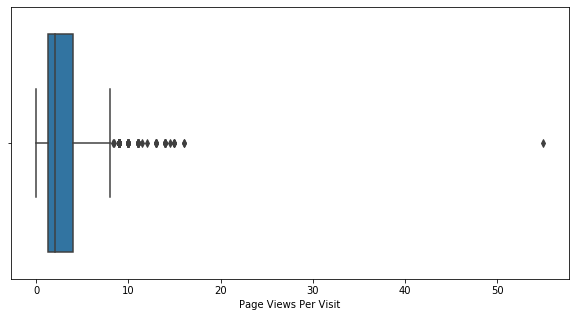

In [747]:
# Visualizing Outliers for 'Page Views Per Visit'
plt.figure(figsize = (10, 5))
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [748]:
# Checking the outliers at quantile level.
print(leads['Page Views Per Visit'].quantile([.75,.85,.90,.95,.96,.97,.98,.99,1]))

0.75     4.0
0.85     4.5
0.90     5.0
0.95     6.0
0.96     7.0
0.97     7.0
0.98     8.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64


> We can see that there is lot of difference between the 99th quantile and the 100th quantile. Let's cap the values at the 99th quantile.

In [749]:
# Capping outliers in exports
leads.loc[leads['Page Views Per Visit'] > 
          leads['TotalVisits'].quantile(.99),"Page Views Per Visit"] = leads['Page Views Per Visit'].quantile(.99)

In [750]:
print(leads['TotalVisits'].quantile([.75,.85,.95,.97,.98,.99,1]))

0.75     5.0
0.85     6.0
0.95     9.0
0.97    11.0
0.98    13.0
0.99    15.0
1.00    15.0
Name: TotalVisits, dtype: float64


In [751]:
num_leads = leads[['TotalVisits','Page Views Per Visit']]
num_leads.describe()

,TotalVisits,Page Views Per Visit
count,6823.000000,6823.000000
mean,3.507841,2.619481
std,2.982243,2.059770
min,0.000000,0.000000
25%,2.000000,1.330000
50%,3.000000,2.000000
75%,5.000000,4.000000
max,15.000000,15.000000


**Outliers have been treated.**

## Data Preparation

In [752]:
leads.nunique()

Lead Number                               6823
Lead Origin                                  3
Lead Source                                  7
Converted                                    2
TotalVisits                                 16
Page Views Per Visit                        84
Specialization                              19
What is your current occupation              3
Lead Profile                                 3
City                                         5
A free copy of Mastering The Interview       2
Last Notable Activity                        3
dtype: int64

In [753]:
leads['A free copy of Mastering The Interview'].value_counts()

No     4272
Yes    2551
Name: A free copy of Mastering The Interview, dtype: int64

### Coverting Binary variables from Yes/No to 0 and 1

In [754]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [755]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Potential Lead,Other Cities,0,Modified
1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Potential Lead,Other Cities,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Potential Lead,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Potential Lead,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Potential Lead,Mumbai,0,Modified


### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [756]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation',
                               'Lead Profile','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [757]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Potential Lead,Other Cities,0,Modified,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Potential Lead,Other Cities,0,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Potential Lead,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Potential Lead,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Potential Lead,Mumbai,0,Modified,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [758]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6823 entries, 0 to 9239
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           6823 non-null   int64  
 1   Lead Origin                                           6823 non-null   object 
 2   Lead Source                                           6823 non-null   object 
 3   Converted                                             6823 non-null   int64  
 4   TotalVisits                                           6823 non-null   float64
 5   Page Views Per Visit                                  6823 non-null   float64
 6   Specialization                                        6823 non-null   object 
 7   What is your current occupation                       6823 non-null   object 
 8   Lead Profile                                          6823

In [759]:
#Renaming columns appropriately 
leads = leads.rename(columns = {'Lead Origin_Landing Page Submission' : 'Origin_Landing Page Submission', 
                     'Lead Origin_Lead Add Form':'Origin_Lead Add Form','Lead Source_Google' : 'Source_Google', 
                     'Lead Source_Olark Chat':'Source_Olark Chat',
                     'Lead Source_Organic Search':'Source_Organic Search','Lead Source_Reference':'Source_Reference',
                     'Lead Source_Welingak Website':'Source_Welingak Website','Referral Sites':'Source_Referral Sites',
                     'What is your current occupation_Unemployed':'Unemployed_Occupation',
                     'What is your current occupation_Working Professional':'Working Professional_Occupation',
                     'City_Other Cities' : 'Other Cities', 
                     'City_Other Cities of Maharashtra':'Other Cities of Maharashtra',
                     'City_Other Metro Cities' : 'Other Metro Cities', 
                     'City_Thane & Outskirts':'Thane & Outskirts','Activity_Modified':'Activity_Modified',
                     'Last Notable Activity_SMS Sent':'Last Notable Activity_SMS Sent',
                     'Lead Profile_Potential Lead':'Profile_Potential Lead',
                     'Lead Profile_Student of SomeSchool':'Lead Profile_Student of SomeSchool'})

In [760]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Origin_Landing Page Submission,Origin_Lead Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Lead Source_Referral Sites,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed_Occupation,Working Professional_Occupation,Profile_Potential Lead,Lead Profile_Student of SomeSchool,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Potential Lead,Other Cities,0,Modified,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Potential Lead,Other Cities,0,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Potential Lead,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Potential Lead,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Potential Lead,Mumbai,0,Modified,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [761]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Origin_Landing Page Submission', 'Origin_Lead Add Form',
       'Source_Google', 'Source_Olark Chat', 'Source_Organic Search',
       'Source_Reference', 'Lead Source_Referral Sites',
       'Source_Welingak Website', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Not

In [762]:
# Dropping original column
leads = leads.drop(['Lead Origin', 'Lead Source', 'Specialization',
                    'What is your current occupation', 'Lead Profile', 'City','Last Notable Activity'], axis = 1)

In [763]:
leads.head()

,Lead Number,Converted,TotalVisits,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Lead Source_Referral Sites,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed_Occupation,Working Professional_Occupation,Profile_Potential Lead,Lead Profile_Student of SomeSchool,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1,660728,0,5.0,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,660727,1,2.0,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,660719,0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,660681,1,2.0,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [764]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6823 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               6823 non-null   int64  
 1   Converted                                 6823 non-null   int64  
 2   TotalVisits                               6823 non-null   float64
 3   Page Views Per Visit                      6823 non-null   float64
 4   A free copy of Mastering The Interview    6823 non-null   int64  
 5   Origin_Landing Page Submission            6823 non-null   uint8  
 6   Origin_Lead Add Form                      6823 non-null   uint8  
 7   Source_Google                             6823 non-null   uint8  
 8   Source_Olark Chat                         6823 non-null   uint8  
 9   Source_Organic Search                     6823 non-null   uint8  
 10  Source_Reference                    

## Train-Test Split

In [765]:
# Importing the required Library
from sklearn.model_selection import train_test_split

In [766]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Lead Source_Referral Sites,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed_Occupation,Working Professional_Occupation,Profile_Potential Lead,Lead Profile_Student of SomeSchool,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
1,5.0,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,2.0,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,2.0,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [767]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [768]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [769]:
from sklearn.preprocessing import StandardScaler

In [770]:
scaler = StandardScaler()

X_train[['TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit']])
X_train.head()


,TotalVisits,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Lead Source_Referral Sites,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed_Occupation,Working Professional_Occupation,Profile_Potential Lead,Lead Profile_Student of SomeSchool,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
5125,0.154809,0.673708,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0
6360,0.821507,-0.696179,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
3229,-0.845238,-0.794028,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9163,-0.511889,-0.304783,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
6968,0.821507,-0.304783,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0


In [772]:
## Checking the Conversion Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

43.52923933753481

**We currently have 43% of conversion rate for Leads.**

## Checking for Correlation

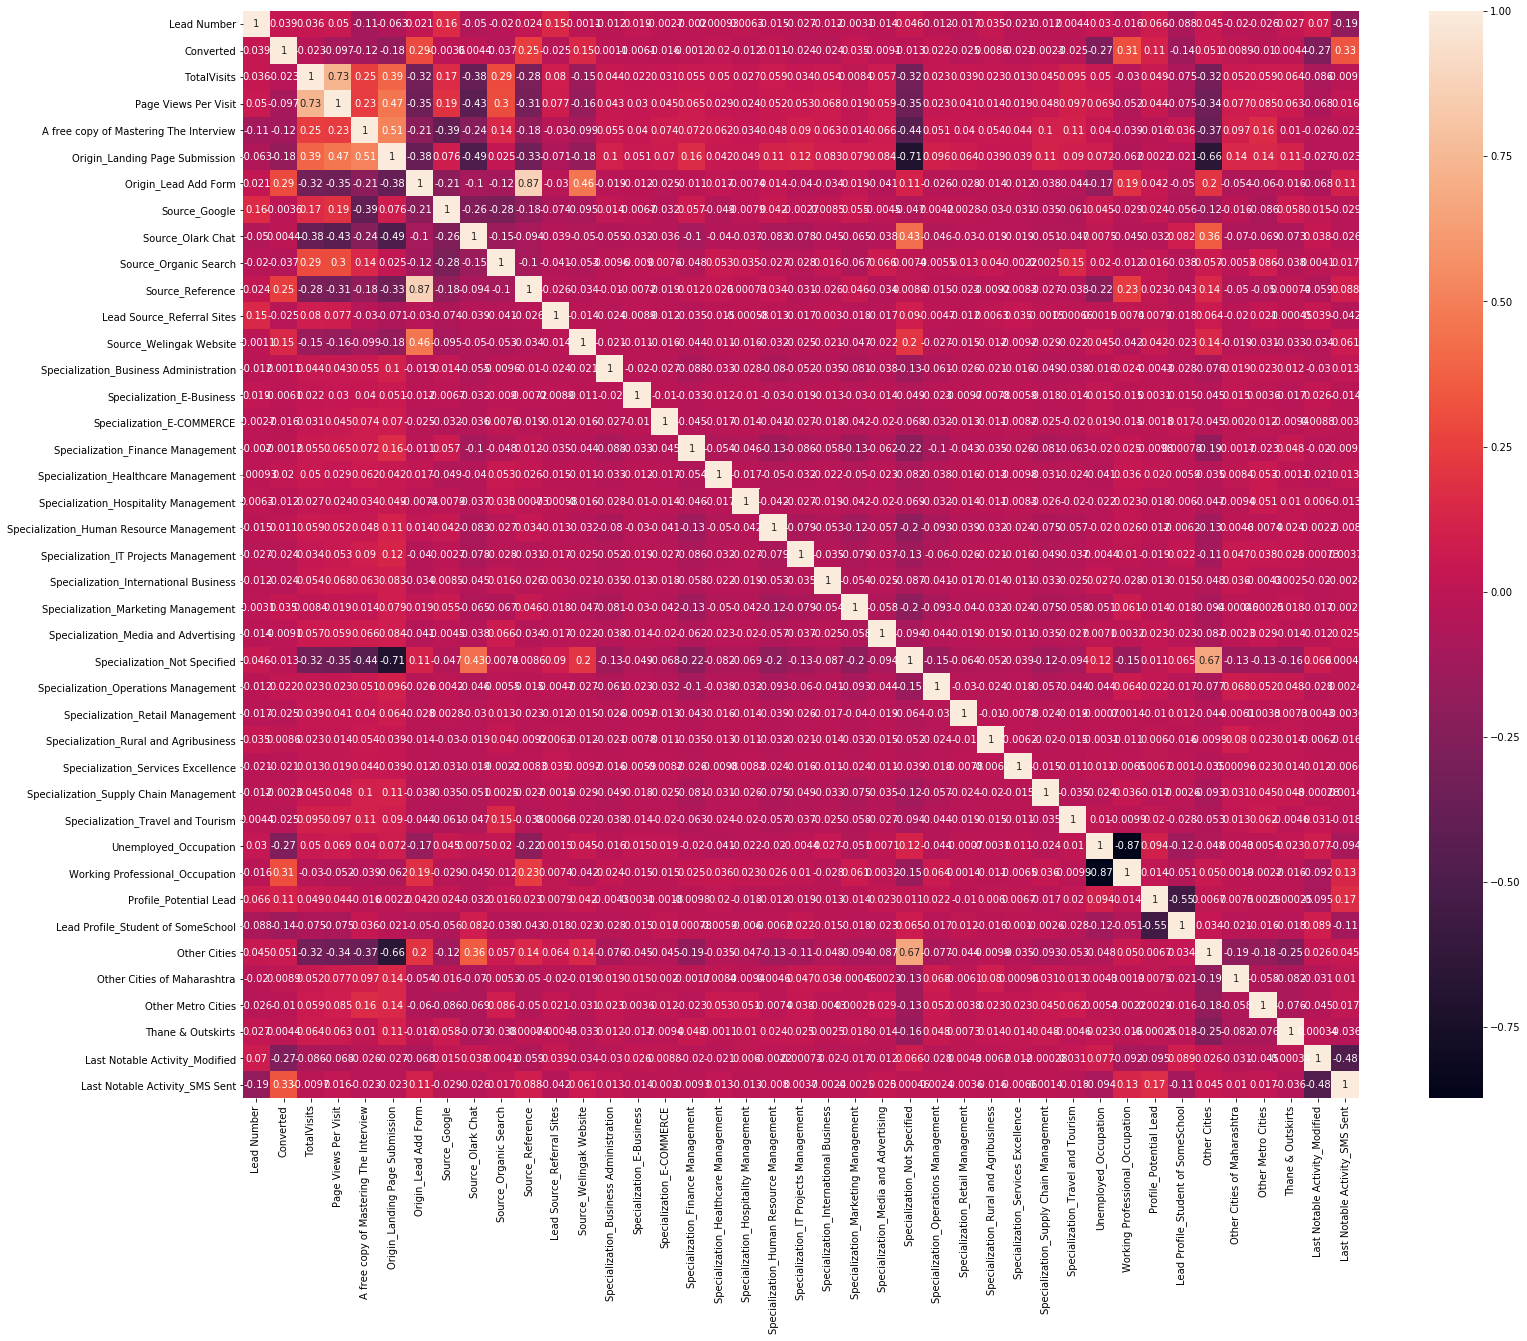

In [782]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,20))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [775]:
lead_corr = leads.corr()

In [777]:
lead_corr

,Lead Number,Converted,TotalVisits,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Lead Source_Referral Sites,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed_Occupation,Working Professional_Occupation,Profile_Potential Lead,Lead Profile_Student of SomeSchool,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
Lead Number,1.000000,0.038917,0.036259,0.050230,-0.112926,-0.063095,0.021375,0.157060,-0.050461,-0.019890,0.023529,0.149777,-0.001117,-0.011781,0.018975,-0.002711,-0.001988,0.000928,0.006270,-0.014538,-0.027055,-0.011807,-0.003138,-0.014454,0.046488,-0.011779,-0.017003,0.035261,-0.020537,-0.011799,0.004398,0.029728,-0.016009,0.065725,-0.087628,0.045468,-0.020497,-0.025937,0.026997,0.070037,-0.185250
Converted,0.038917,1.000000,-0.023027,-0.097363,-0.116960,-0.175959,0.290786,-0.003588,0.004428,-0.037039,0.246104,-0.025217,0.147899,0.001112,-0.006116,-0.016027,-0.001204,0.019736,-0.011574,0.011187,-0.024068,-0.024331,0.034874,-0.009095,-0.013223,0.021579,-0.025001,0.008596,-0.021328,-0.002289,-0.024629,-0.270783,0.306124,0.111546,-0.138602,0.051059,0.008945,-0.010255,0.004393,-0.269053,0.331447
TotalVisits,0.036259,-0.023027,1.000000,0.729690,0.245473,0.391502,-0.322467,0.165277,-0.375364,0.291011,-0.281115,0.080223,-0.147671,0.044144,0.021672,0.030937,0.054829,0.049904,0.026532,0.058584,0.034128,0.053847,0.008444,0.057225,-0.319957,0.022668,0.038913,0.023185,0.013487,0.045223,0.094635,0.050217,-0.030452,0.049362,-0.074895,-0.316175,0.052025,0.059426,0.064267,-0.086072,-0.009681
Page Views Per Visit,0.050230,-0.097363,0.729690,1.000000,0.233097,0.466074,-0.352417,0.189145,-0.433177,0.303914,-0.306196,0.076511,-0.163539,0.042510,0.029782,0.044710,0.064923,0.029419,0.024115,0.052177,0.052615,0.067788,0.018999,0.058846,-0.350653,0.023379,0.041165,0.013991,0.018931,0.047587,0.097209,0.069435,-0.051899,0.043734,-0.075195,-0.338914,0.076675,0.084731,0.062750,-0.067792,0.016499
A free copy of Mastering The Interview,-0.112926,-0.116960,0.245473,0.233097,1.000000,0.514700,-0.209546,-0.394495,-0.242923,0.143187,-0.180829,-0.030308,-0.098785,0.055316,0.040154,0.073630,0.071611,0.062147,0.034012,0.047863,0.089926,0.063237,0.014271,0.066475,-0.438325,0.050958,0.040312,0.053930,0.044495,0.103180,0.109061,0.039630,-0.039354,-0.015526,0.035761,-0.366745,0.097480,0.163794,0.010346,-0.025925,-0.022786
Origin_Landing Page Submission,-0.063095,-0.175959,0.391502,0.466074,0.514700,1.000000,-0.380059,0.075697,-0.485698,0.024637,-0.330274,-0.071217,-0.175226,0.104104,0.051357,0.069990,0.164561,0.042152,0.048763,0.111348,0.123262,0.082734,0.078950,0.083510,-0.705461,0.096397,0.064483,0.039153,0.039074,0.110402,0.089671,0.072303,-0.062117,0.002247,-0.021485,-0.655919,0.140068,0.143248,0.114068,-0.027021,-0.022616
Origin_Lead Add Form,0.021375,0.290786,-0.322467,-0.352417,-0.209546,-0.380059,1.000000,-0.206879,-0.104271,-0.115144,0.869006,-0.030180,0.461049,-0.019490,-0.012095,-0.025139,-0.011224,0.017012,-0.007421,0.013528,-0.040183,-0.033582,0.019245,-0.040783,0.108243,-0.026375,-0.027881,-0.014262,-0.011907,-0.038200,-0.044354,-0.169347,0.185414,0.041747,-0.049909,0.195609,-0.054246,-0.059588,-0.015715,-0.068238,0.1